In [35]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [36]:
!ln -s /content/gdrive/My\ Drive/ /Tu-dortmund


ln: failed to create symbolic link '/Tu-dortmund/My Drive': File exists


In [37]:
%cd /content/gdrive/MyDrive/Tu-dortmund

/content/gdrive/MyDrive/Tu-dortmund


In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from plotly.offline import iplot
import cufflinks as cf
cf.go_offline()
import plotly.graph_objects as go
fig = go.Figure()

from wordcloud import WordCloud

import plotly.express as px
%matplotlib inline

In [39]:
import pandas as pd
df = pd.read_csv('/content/gdrive/MyDrive/Tu-dortmund/MoviesOnStreamingPlatforms.csv')


In [40]:
df.head()

,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,4,5,Roma,2018,18+,94/100,1,0,0,0,0


In [41]:
cols = df.columns.tolist()
cols

['Unnamed: 0',
 'ID',
 'Title',
 'Year',
 'Age',
 'Rotten Tomatoes',
 'Netflix',
 'Hulu',
 'Prime Video',
 'Disney+',
 'Type']

In [42]:
df.drop(['Unnamed: 0','ID',], axis=1, inplace = True)
cols = df.columns.tolist()
cols

['Title',
 'Year',
 'Age',
 'Rotten Tomatoes',
 'Netflix',
 'Hulu',
 'Prime Video',
 'Disney+',
 'Type']

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            9515 non-null   object
 1   Year             9515 non-null   int64 
 2   Age              5338 non-null   object
 3   Rotten Tomatoes  9508 non-null   object
 4   Netflix          9515 non-null   int64 
 5   Hulu             9515 non-null   int64 
 6   Prime Video      9515 non-null   int64 
 7   Disney+          9515 non-null   int64 
 8   Type             9515 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 669.1+ KB


In [44]:
print("Percentage of Missing Data")
(df.isnull().sum()/df.shape[0])*100

Percentage of Missing Data


,0
Title,0.000000
Year,0.000000
Age,43.899107
Rotten Tomatoes,0.073568
Netflix,0.000000
Hulu,0.000000
Prime Video,0.000000
Disney+,0.000000
Type,0.000000


In [45]:
pd.isnull(df["Age"])



,Age
0,False
1,False
2,False
3,False
4,False
...,...
9510,True
9511,True
9512,True
9513,True


In [46]:
# df['Age'].fillna('Unknown', inplace=True)



In [47]:
pd.isnull(df['Age'])

,Age
0,False
1,False
2,False
3,False
4,False
...,...
9510,True
9511,True
9512,True
9513,True


In [48]:
df.Age.value_counts()

,count
Age,
18+,2276
7+,1090
13+,998
all,698
16+,276


In [51]:
# Map the age ratings to numeric values (if needed for other analysis)
age_map = {'18+': 18, '7+': 7, '13+': 13, 'all': 0, '16+': 16}
df['intAge'] = df['Age'].map(age_map)

# Check for missing values in the 'intAge' column
missing_age_count = df['intAge'].isna().sum()
print(f"Number of missing age values: {missing_age_count}")

# Impute missing values with the mode (most frequent value)
mode_age = df['intAge'].mode()[0]
df['intAge'].fillna(mode_age, inplace=True)

# Verify if missing values are filled after imputation
missing_age_count_after = df['intAge'].isna().sum()
print(f"Number of missing age values after imputation: {missing_age_count_after}")



Number of missing age values: 4177
Number of missing age values after imputation: 0


<ipython-input-51-4bde39aad5e8>:11: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [52]:
# Install the required libraries (if not already installed)
# !pip install plotly cufflinks

# Import libraries
import pandas as pd
import cufflinks as cf
import plotly.io as pio

# Enable offline mode for cufflinks and configure Colab to display Plotly plots inline
cf.go_offline()
pio.renderers.default = 'colab'

# Your plotting code
df['Age'].value_counts().iplot(kind='bar',
                                 xTitle='Age Group',
                                 yTitle='Count of Movies',
                                 title="Number of Movies in specific age group in All services")



In [53]:
# Make a copy of the data and filter for Netflix movies only
data_netflix = df[df['Netflix'] == 1].copy()

# Plot the count of movies in each age group for Netflix
data_netflix['Age'].value_counts().iplot(kind='bar',
                                         colors='red',
                                         xTitle='Age Group',
                                         yTitle='Count of Movies',
                                         title="Number of Movies in specific age group on Netflix")


In [54]:
# Make a copy of the data and filter for Disney+ movies only
data_disney = df[df['Disney+'] == 1].copy()

# Plot the count of movies in each age group for Disney+
data_disney['Age'].value_counts().iplot(kind='bar',
                                        color='Purple',
                                        xTitle='Age Group',
                                        yTitle='Count of Movies',
                                        title="Number of Movies in specific age group on Disney+")


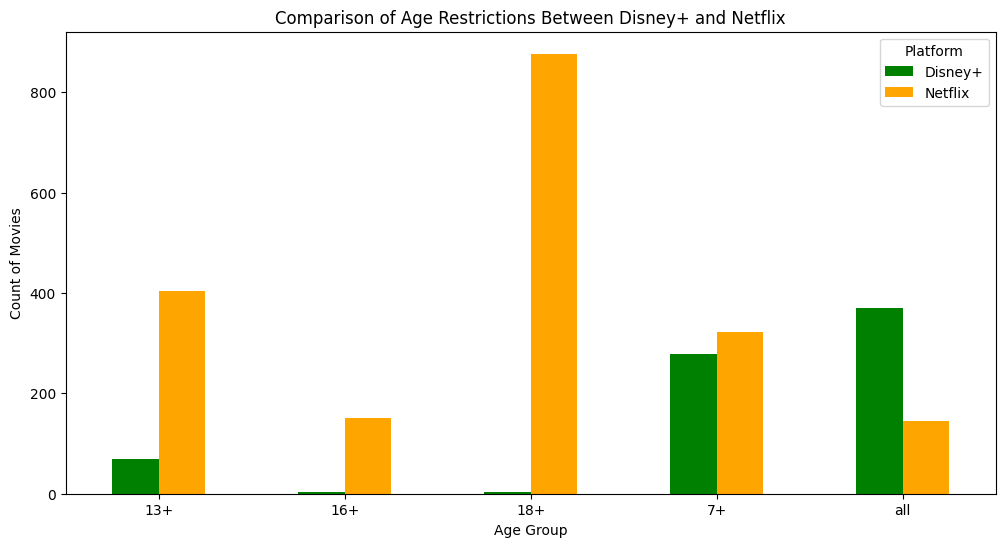

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# # Filter the data for Netflix movies only
# data_netflix = df[df['Netflix'] == 1].copy()

# Get the count of movies in each age group for both platforms
disney_age_counts = data_disney['Age'].value_counts().sort_index()
netflix_age_counts = data_netflix['Age'].value_counts().sort_index()

# Combine the counts into a single DataFrame
age_group_comparison = pd.DataFrame({
    'Disney+': disney_age_counts,
    'Netflix': netflix_age_counts
}).fillna(0)  # Fill missing values with 0 if there are no movies in a specific age group

# Plotting
age_group_comparison.plot(kind='bar', figsize=(12, 6), color=['green', 'orange'])
plt.title('Comparison of Age Restrictions Between Disney+ and Netflix')
plt.xlabel('Age Group')
plt.ylabel('Count of Movies')
plt.xticks(rotation=0)
plt.legend(title='Platform')
plt.show()


In [56]:
# Separate data for Netflix and Disney+
data_netflix = df[df['Netflix'] == 1].copy()
data_disney = df[df['Disney+'] == 1].copy()

# Descriptive statistics for Age groups on Netflix and Disney+
print("Netflix Age Group Statistics:")
print(data_netflix['intAge'].describe())

print("\nDisney+ Age Group Statistics:")
print(data_disney['intAge'].describe())


Netflix Age Group Statistics:
count    3695.000000
mean       15.711502
std         4.564714
min         0.000000
25%        16.000000
50%        18.000000
75%        18.000000
max        18.000000
Name: intAge, dtype: float64

Disney+ Age Group Statistics:
count    922.000000
mean       7.071584
std        7.003123
min        0.000000
25%        0.000000
50%        7.000000
75%       13.000000
max       18.000000
Name: intAge, dtype: float64


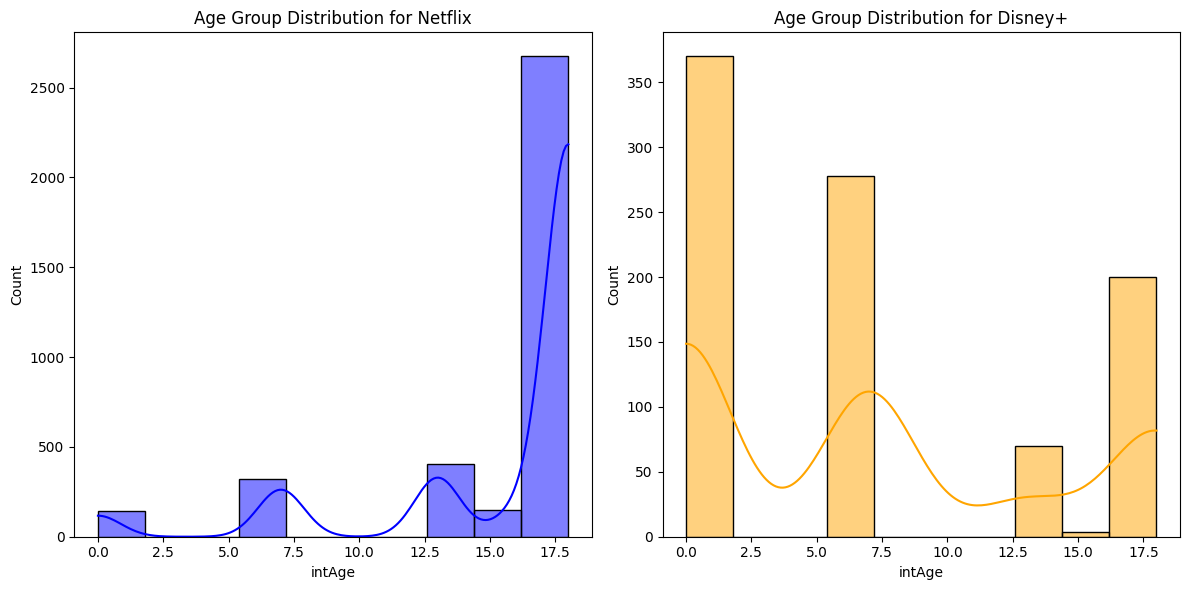

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create histograms for Netflix and Disney+ age groups
plt.figure(figsize=(12, 6))

# Netflix Age Group Histogram
plt.subplot(1, 2, 1)
sns.histplot(data_netflix['intAge'], kde=True, color='blue', bins=10)
plt.title('Age Group Distribution for Netflix')

# Disney+ Age Group Histogram
plt.subplot(1, 2, 2)
sns.histplot(data_disney['intAge'], kde=True, color='orange', bins=10)
plt.title('Age Group Distribution for Disney+')

plt.tight_layout()
plt.show()


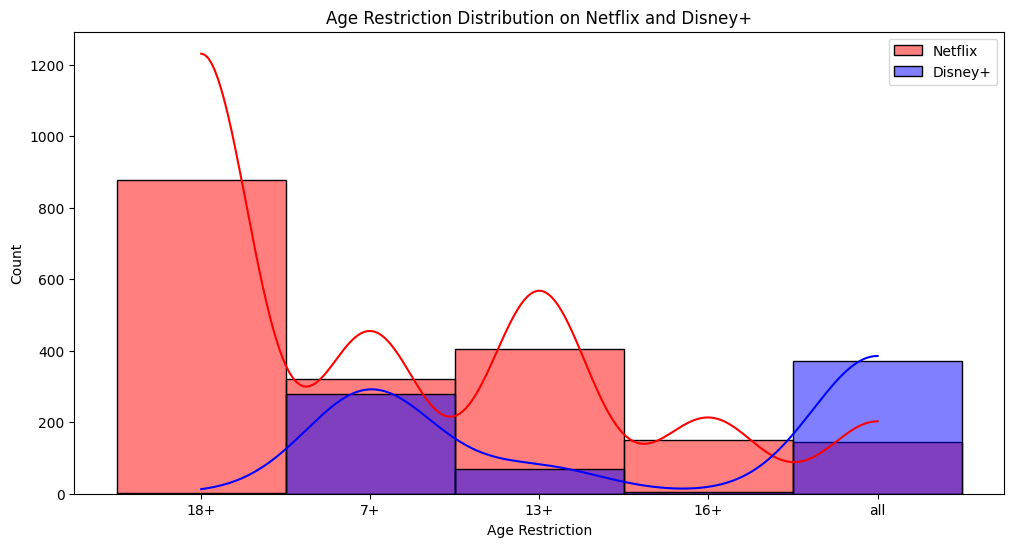

In [58]:
plt.figure(figsize=(12, 6))
sns.histplot(data_netflix['Age'], color="red", label="Netflix", kde=True)
sns.histplot(data_disney['Age'], color="blue", label="Disney+", kde=True)
plt.xlabel('Age Restriction')
plt.title('Age Restriction Distribution on Netflix and Disney+')
plt.legend()
plt.show()

In [62]:
print("Netflix Age Group Statistics:")
print(data_netflix['intAge'].describe())

print("\nDisney+ Age Group Statistics:")
print(data_disney['intAge'].describe())

# Calculate IQR for both platforms
netflix_iqr = data_netflix['intAge'].quantile(0.75) - data_netflix['intAge'].quantile(0.25)
disney_iqr = data_disney['intAge'].quantile(0.75) - data_disney['intAge'].quantile(0.25)

print("\nNetflix IQR:", netflix_iqr)
print("Disney+ IQR:", disney_iqr)


Netflix Age Group Statistics:
count    3695.000000
mean       15.711502
std         4.564714
min         0.000000
25%        16.000000
50%        18.000000
75%        18.000000
max        18.000000
Name: intAge, dtype: float64

Disney+ Age Group Statistics:
count    922.000000
mean       7.071584
std        7.003123
min        0.000000
25%        0.000000
50%        7.000000
75%       13.000000
max       18.000000
Name: intAge, dtype: float64

Netflix IQR: 2.0
Disney+ IQR: 13.0


<ipython-input-59-c2939c059d2f>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




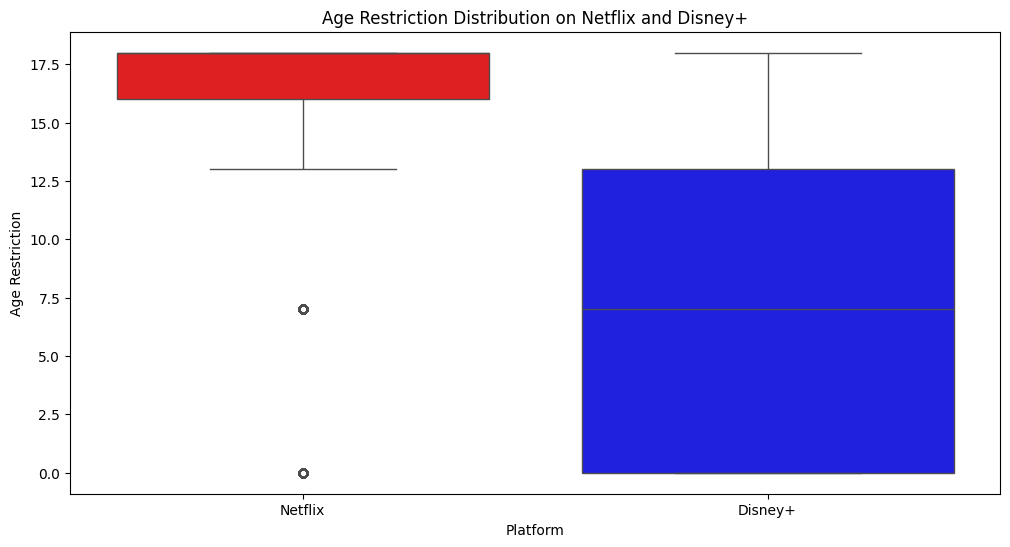

In [59]:
# Reset index and assign Platform labels
data_netflix_reset = data_netflix.reset_index(drop=True).assign(Platform='Netflix')
data_disney_reset = data_disney.reset_index(drop=True).assign(Platform='Disney+')

# Concatenate the data without duplicates in index
combined_data = pd.concat([data_netflix_reset, data_disney_reset], ignore_index=True)

# Ensure no duplicates in column names
combined_data = combined_data.loc[:, ~combined_data.columns.duplicated()]

# Create the boxplot with different colors for each platform
plt.figure(figsize=(12, 6))
sns.boxplot(x='Platform', y='intAge', data=combined_data, palette={'Netflix': 'red', 'Disney+': 'blue'})
plt.title('Age Restriction Distribution on Netflix and Disney+')
plt.xlabel('Platform')
plt.ylabel('Age Restriction')
plt.show()




Mean Age Rating for Netflix: 15.71150202976996
Mean Age Rating for Disney+: 7.071583514099783


<ipython-input-66-bffc9a70d312>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




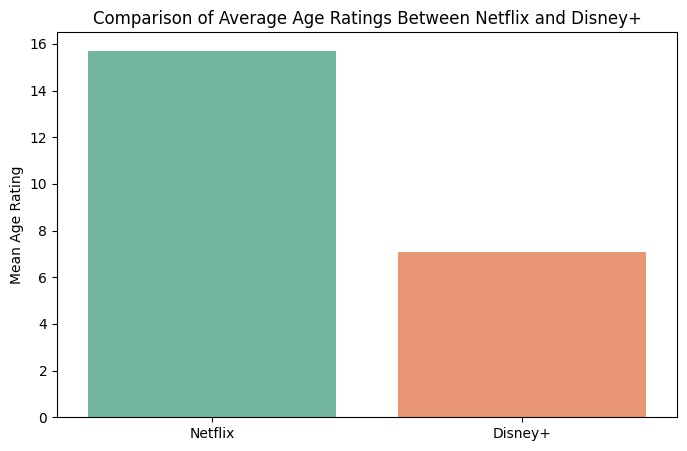

In [66]:
# Calculate the mean age rating for Netflix and Disney+
mean_netflix_age = data_netflix['intAge'].mean()
mean_disney_age = data_disney['intAge'].mean()

# Display the means
print(f"Mean Age Rating for Netflix: {mean_netflix_age}")
print(f"Mean Age Rating for Disney+: {mean_disney_age}")

# Plot comparison of mean age ratings
plt.figure(figsize=(8, 5))
sns.barplot(x=['Netflix', 'Disney+'], y=[mean_netflix_age, mean_disney_age], palette="Set2")
plt.title('Comparison of Average Age Ratings Between Netflix and Disney+')
plt.ylabel('Mean Age Rating')
plt.show()


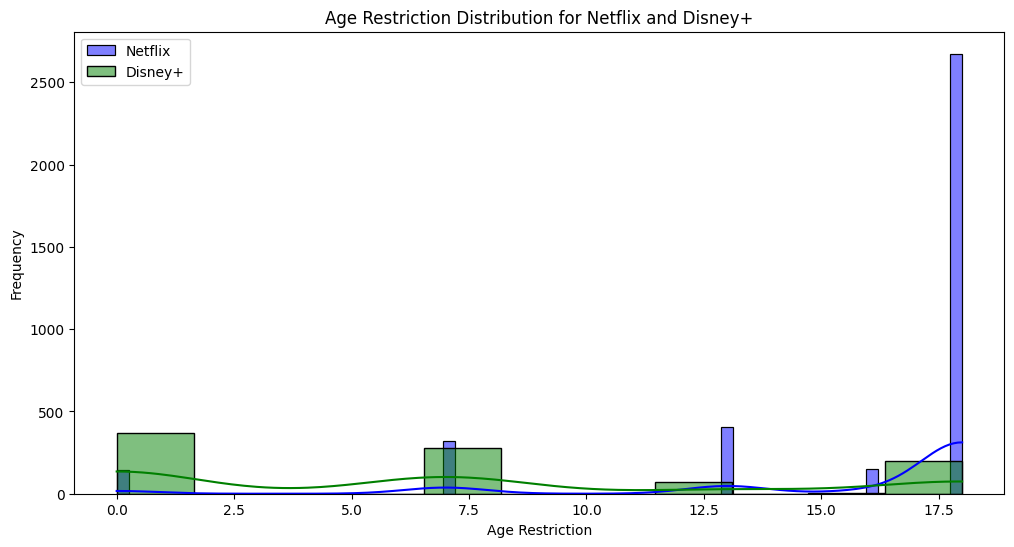

T-statistic: 45.62046989819887
P-value: 0.0
Reject the null hypothesis: The average age restriction for Disney+ is lower than for Netflix.


In [67]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Check for normality using histograms (visual check)
plt.figure(figsize=(12, 6))
sns.histplot(data_netflix['intAge'], color='blue', label="Netflix", kde=True)
sns.histplot(data_disney['intAge'], color='green', label="Disney+", kde=True)
plt.title('Age Restriction Distribution for Netflix and Disney+')
plt.xlabel('Age Restriction')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Step 2: Conducting a Two-Sample t-Test (Assume equal variances)
t_stat, p_value = stats.ttest_ind(data_netflix['intAge'].dropna(), data_disney['intAge'].dropna(), equal_var=True)

# Step 3: Output t-statistic and p-value
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Step 4: Interpret the result
alpha = 0.05  # Significance level

if p_value < alpha:
    print("Reject the null hypothesis: The average age restriction for Disney+ is lower than for Netflix.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average age restriction between Disney+ and Netflix.")


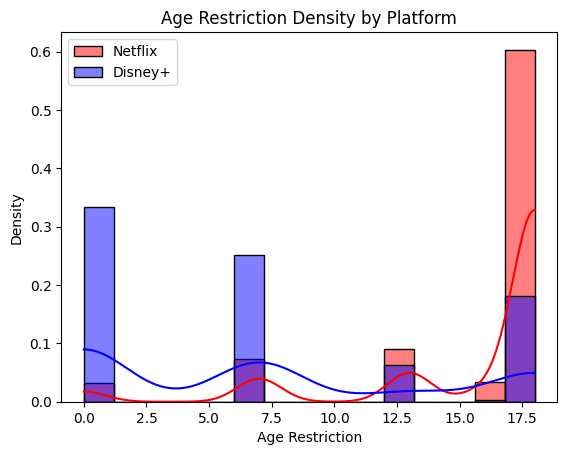

In [68]:
sns.histplot(data_netflix['intAge'], kde=True, color='red', label='Netflix', stat='density', bins=15)
sns.histplot(data_disney['intAge'], kde=True, color='blue', label='Disney+', stat='density', bins=15)
plt.title('Age Restriction Density by Platform')
plt.xlabel('Age Restriction')
plt.ylabel('Density')
plt.legend()
plt.show()



In [69]:
from scipy.stats import mannwhitneyu

u_stat, p_value = mannwhitneyu(data_netflix['intAge'], data_disney['intAge'], alternative='two-sided')
print("Mann-Whitney U Test:")
print("U-statistic:", u_stat)
print("P-value:", p_value)


Mann-Whitney U Test:
U-statistic: 2773218.0
P-value: 9.795007028527339e-254


In [64]:
print(data_netflix['intAge'].isnull().sum())  # Check for missing values in Netflix
print(data_disney['intAge'].isnull().sum())  # Check for missing values in Disney+


0
0


In [65]:
from scipy.stats import ks_2samp

ks_stat, ks_p_value = ks_2samp(data_netflix['intAge'], data_disney['intAge'])
print("Kolmogorov-Smirnov Test:")
print("KS-statistic:", ks_stat)
print("P-value:", ks_p_value)


Kolmogorov-Smirnov Test:
KS-statistic: 0.5767035831383795
P-value: 1.7955939915070755e-229


In [70]:
df.columns


Index(['Title', 'Year', 'Age', 'Rotten Tomatoes', 'Netflix', 'Hulu',
       'Prime Video', 'Disney+', 'Type', 'intAge'],
      dtype='object')

In [71]:
pd.isnull(df['Rotten Tomatoes'])

,Rotten Tomatoes
0,False
1,False
2,False
3,False
4,False
...,...
9510,False
9511,False
9512,False
9513,False


In [77]:
df['New_Rotten_Tomatoes'] = df['Rotten Tomatoes'].fillna(0)

In [78]:
print(df['New_Rotten_Tomatoes'])

0       98/100
1       97/100
2       95/100
3       94/100
4       94/100
         ...  
9510    14/100
9511    13/100
9512    13/100
9513    10/100
9514    10/100
Name: New_Rotten_Tomatoes, Length: 9515, dtype: object


In [79]:
# Remove '/100' from the 'New_Rotten_Tomatoes' column and convert to numeric
df['New_Rotten_Tomatoes'] = df['New_Rotten_Tomatoes'].str.replace('/100', '', regex=False)

# Convert to numeric (int) and handle any invalid entries as NaN
df['New_Rotten_Tomatoes'] = pd.to_numeric(df['New_Rotten_Tomatoes'], errors='coerce')

# Display the updated DataFrame to verify the conversion
print(df['New_Rotten_Tomatoes'].head())


0    98.0
1    97.0
2    95.0
3    94.0
4    94.0
Name: New_Rotten_Tomatoes, dtype: float64


In [80]:
# Fill NaN values with a default value (e.g., 0)
df['New_Rotten_Tomatoes'] = df['New_Rotten_Tomatoes'].fillna(0)

# Convert the column to integers
df['New_Rotten_Tomatoes'] = df['New_Rotten_Tomatoes'].astype(int)

# Display the updated column
print(df['New_Rotten_Tomatoes'].head())



0    98
1    97
2    95
3    94
4    94
Name: New_Rotten_Tomatoes, dtype: int64


In [94]:
# Filter the dataset to include only Netflix and Disney+ movies
netflix_data = df[(df['Netflix'] == 1)]
disney_data = df[(df['Disney+'] == 1)]


In [95]:
# Descriptive statistics for Netflix
netflix_stats = netflix_data['New_Rotten_Tomatoes'].describe()
print("Netflix Rotten Tomatoes Score Statistics:")
print(netflix_stats)

# Descriptive statistics for Disney+
disney_stats = disney_data['New_Rotten_Tomatoes'].describe()
print("\nDisney+ Rotten Tomatoes Score Statistics:")
print(disney_stats)


Netflix Rotten Tomatoes Score Statistics:
count    3695.000000
mean       54.344790
std        14.035676
min         0.000000
25%        45.000000
50%        53.000000
75%        63.000000
max        98.000000
Name: New_Rotten_Tomatoes, dtype: float64

Disney+ Rotten Tomatoes Score Statistics:
count    922.000000
mean      58.312364
std       13.953313
min       10.000000
25%       48.000000
50%       57.500000
75%       67.750000
max       96.000000
Name: New_Rotten_Tomatoes, dtype: float64


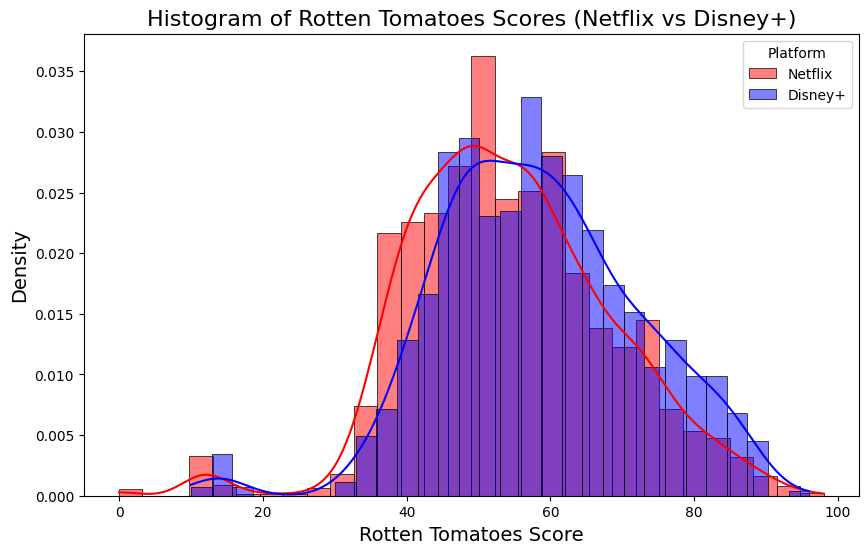

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Plotting Histograms of Rotten Tomatoes Scores
plt.figure(figsize=(10, 6))

# Plot histograms for both platforms
sns.histplot(netflix_data['New_Rotten_Tomatoes'], kde=True, color='red', label='Netflix', bins=30, stat='density', linewidth=0.5)
sns.histplot(disney_data['New_Rotten_Tomatoes'], kde=True, color='blue', label='Disney+', bins=30, stat='density', linewidth=0.5)

# Add titles and labels
plt.title('Histogram of Rotten Tomatoes Scores (Netflix vs Disney+)', fontsize=16)
plt.xlabel('Rotten Tomatoes Score', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title='Platform')

# Show the plot
plt.show()

<ipython-input-83-05243149f33a>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




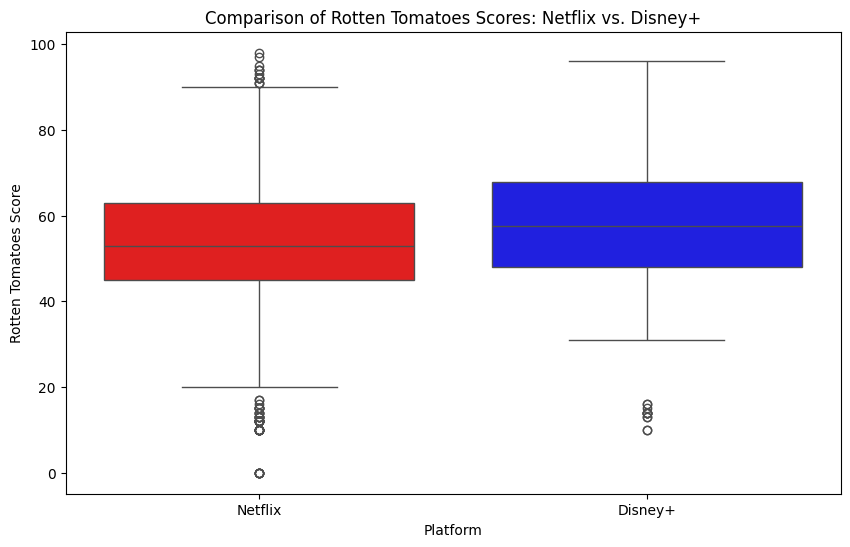

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Make sure pandas is imported

# Combine the two datasets for plotting
netflix_data['Platform'] = 'Netflix'
disney_data['Platform'] = 'Disney+'
combined_data = pd.concat([netflix_data, disney_data], ignore_index=True) # Concatenate along rows (default axis=0) and reset index

# Box plot for Rotten Tomatoes scores on Netflix vs. Disney+
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_data, x='Platform', y='New_Rotten_Tomatoes', palette={'Netflix' : 'red', 'Disney+' : 'blue'})
plt.title("Comparison of Rotten Tomatoes Scores: Netflix vs. Disney+")
plt.xlabel("Platform")
plt.ylabel("Rotten Tomatoes Score")
plt.show()

In [84]:
pd.isnull(df).sum()

,0
Title,0
Year,0
Age,4177
Rotten Tomatoes,7
Netflix,0
Hulu,0
Prime Video,0
Disney+,0
Type,0
intAge,0


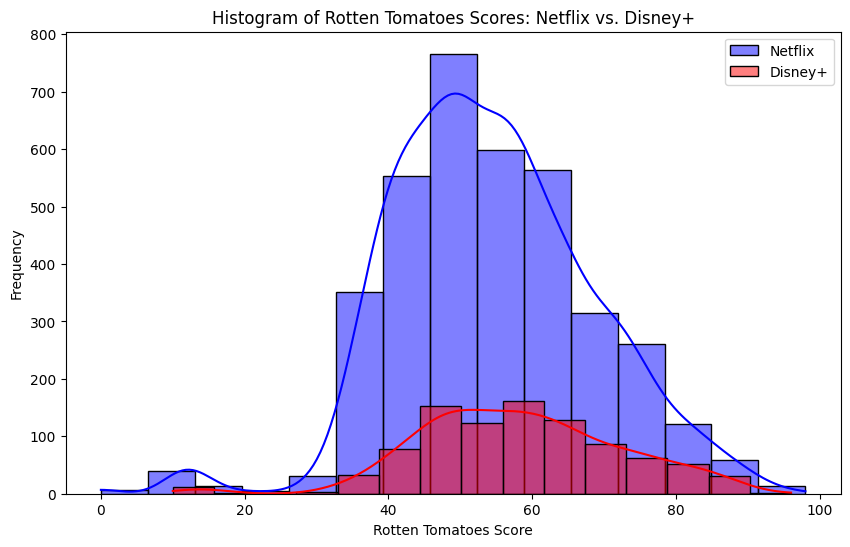

In [85]:
plt.figure(figsize=(10, 6))
sns.histplot(netflix_data['New_Rotten_Tomatoes'], color="blue", label="Netflix", kde=True, bins=15)
sns.histplot(disney_data['New_Rotten_Tomatoes'], color="red", label="Disney+", kde=True, bins=15)
plt.title("Histogram of Rotten Tomatoes Scores: Netflix vs. Disney+")
plt.xlabel("Rotten Tomatoes Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()

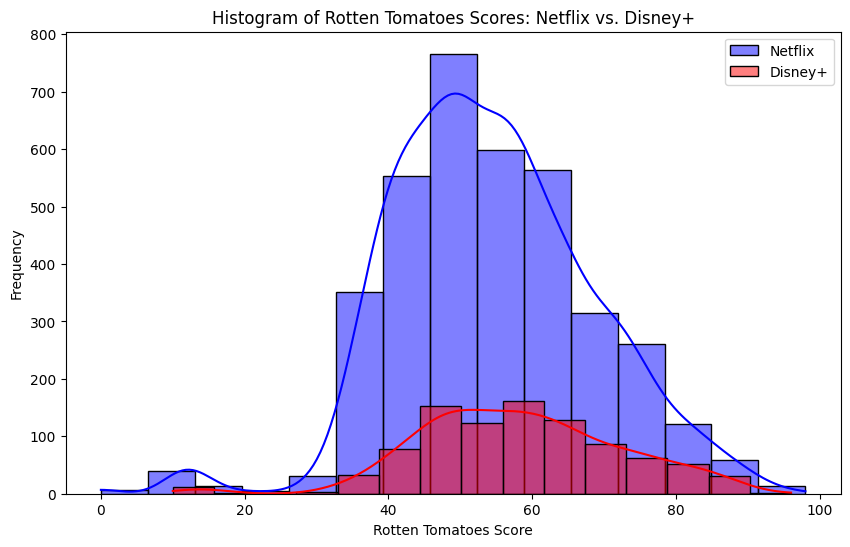

Shapiro-Wilk test for Netflix: p-value = 1.1373336032725542e-20
Shapiro-Wilk test for Disney+: p-value = 7.2595534451430395e-09


In [86]:
# Check the normality of Rotten Tomatoes scores for Netflix and Disney+
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Visualize distributions with histograms
plt.figure(figsize=(10, 6))
sns.histplot(netflix_data['New_Rotten_Tomatoes'], color="blue", label="Netflix", kde=True, bins=15)
sns.histplot(disney_data['New_Rotten_Tomatoes'], color="red", label="Disney+", kde=True, bins=15)
plt.title("Histogram of Rotten Tomatoes Scores: Netflix vs. Disney+")
plt.xlabel("Rotten Tomatoes Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Shapiro-Wilk test for normality (Netflix and Disney+)
shapiro_netflix = stats.shapiro(netflix_data['New_Rotten_Tomatoes'].dropna())
shapiro_disney = stats.shapiro(disney_data['New_Rotten_Tomatoes'].dropna())

print(f"Shapiro-Wilk test for Netflix: p-value = {shapiro_netflix.pvalue}")
print(f"Shapiro-Wilk test for Disney+: p-value = {shapiro_disney.pvalue}")


In [87]:
# Levene's test for equality of variances
levene_test = stats.levene(netflix_data['New_Rotten_Tomatoes'].dropna(), disney_data['New_Rotten_Tomatoes'].dropna())
print(f"Levene's Test p-value: {levene_test.pvalue}")


Levene's Test p-value: 0.8432821977088365


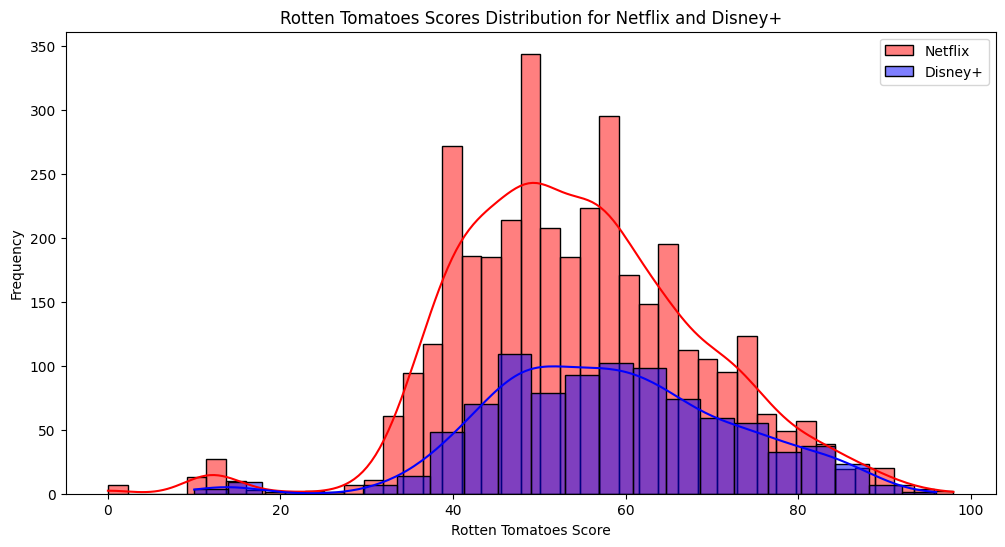

T-statistic: -7.687624476826725
P-value: 1.819690341963791e-14
Reject the null hypothesis: There is a significant difference in Rotten Tomatoes scores between Netflix and Disney+.


In [99]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Check for normality using histograms (visual check)
plt.figure(figsize=(12, 6))
sns.histplot(netflix_data['New_Rotten_Tomatoes'], color='red', label="Netflix", kde=True)
sns.histplot(disney_data['New_Rotten_Tomatoes'], color='blue', label="Disney+", kde=True)
plt.title('Rotten Tomatoes Scores Distribution for Netflix and Disney+')
plt.xlabel('Rotten Tomatoes Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Step 2: Conducting a Two-Sample t-Test (Assume equal variances)
t_stat, p_value = stats.ttest_ind(netflix_data['New_Rotten_Tomatoes'].dropna(),
                                   disney_data['New_Rotten_Tomatoes'].dropna(),
                                   equal_var=True)

# Step 3: Output t-statistic and p-value
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Step 4: Interpret the result
alpha = 0.05  # Significance level

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in Rotten Tomatoes scores between Netflix and Disney+.")
else:
    print("Fail to reject the null hypothesis: No significant difference in Rotten Tomatoes scores between Netflix and Disney+.")


In [90]:
import pandas as pd

# Assuming 'df' is your main DataFrame with columns 'Netflix', 'Disney+', and 'New_Rotten_Tomatoes'

# Example of how to define the DataFrame (replace with actual data if available)
# df = pd.DataFrame({
#     'Netflix': [...],
#     'Disney+': [...],
#     'New_Rotten_Tomatoes': [...]
# })

# Redefine Netflix and Disney+ subsets for Rotten Tomatoes score analysis
netflix_data = df[df['Netflix'] == 1]['New_Rotten_Tomatoes'].dropna()
disney_data = df[df['Disney+'] == 1]['New_Rotten_Tomatoes'].dropna()

# Convert Rotten Tomatoes scores to integer if necessary
netflix_data = netflix_data.astype(int)
disney_data = disney_data.astype(int)

# Calculate the median and mean Rotten Tomatoes scores for both Netflix and Disney+
median_netflix_score = netflix_data.median()
median_disney_score = disney_data.median()

mean_netflix_score = netflix_data.mean()
mean_disney_score = disney_data.mean()

# Display results
print("Median Rotten Tomatoes Score - Netflix:", median_netflix_score)
print("Median Rotten Tomatoes Score - Disney+:", median_disney_score)
print("Mean Rotten Tomatoes Score - Netflix:", mean_netflix_score)
print("Mean Rotten Tomatoes Score - Disney+:", mean_disney_score)


Median Rotten Tomatoes Score - Netflix: 53.0
Median Rotten Tomatoes Score - Disney+: 57.5
Mean Rotten Tomatoes Score - Netflix: 54.344790257104194
Mean Rotten Tomatoes Score - Disney+: 58.31236442516269


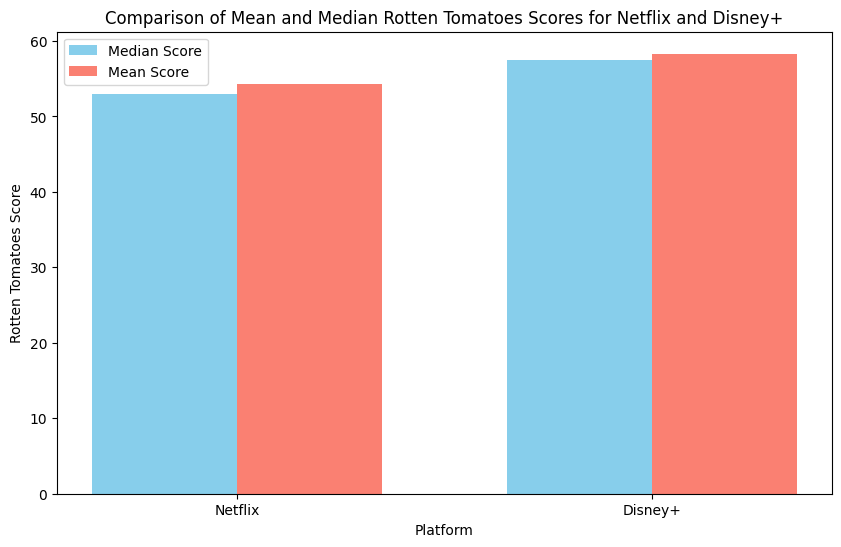

In [ ]:
platforms = ['Netflix', 'Disney+']
median_scores = [median_netflix_score, median_disney_score]
mean_scores = [mean_netflix_score, mean_disney_score]

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(platforms))

# Plotting median and mean scores
plt.bar(index, median_scores, bar_width, color='skyblue', label='Median Score')
plt.bar([i + bar_width for i in index], mean_scores, bar_width, color='salmon', label='Mean Score')

plt.xlabel('Platform')
plt.ylabel('Rotten Tomatoes Score')
plt.title('Comparison of Mean and Median Rotten Tomatoes Scores for Netflix and Disney+')
plt.xticks([i + bar_width / 2 for i in index], platforms)
plt.legend()

In [91]:
from scipy.stats import mannwhitneyu

# Separate the Rotten Tomatoes scores for Netflix and Disney+
netflix_scores = combined_data[combined_data['Platform'] == 'Netflix']['New_Rotten_Tomatoes']
disney_scores = combined_data[combined_data['Platform'] == 'Disney+']['New_Rotten_Tomatoes']

# Perform the Mann-Whitney U test
u_statistic, p_value = mannwhitneyu(netflix_scores, disney_scores, alternative='two-sided')

# Print the results
print("Mann-Whitney U test results:")
print(f"U-statistic: {u_statistic}")
print(f"P-value: {p_value}")

# Hypotheses
print("\nHypotheses:")
print("• Null Hypothesis (H0): There is no difference in Rotten Tomatoes scores between Netflix and Disney+.")
print("• Alternative Hypothesis (H1): There is a significant difference in Rotten Tomatoes scores between Netflix and Disney+.")

# Interpretation based on the p-value
alpha = 0.05  # Significance level
if p_value < alpha:
    print("\nConclusion: Reject the null hypothesis (H0).")
    print("There is a significant difference in Rotten Tomatoes scores between Netflix and Disney+.")
else:
    print("\nConclusion: Fail to reject the null hypothesis (H0).")
    print("There is no significant difference in Rotten Tomatoes scores between Netflix and Disney+.")


Mann-Whitney U test results:
U-statistic: 1415471.0
P-value: 1.807106713413065e-15

Hypotheses:
• Null Hypothesis (H0): There is no difference in Rotten Tomatoes scores between Netflix and Disney+.
• Alternative Hypothesis (H1): There is a significant difference in Rotten Tomatoes scores between Netflix and Disney+.

Conclusion: Reject the null hypothesis (H0).
There is a significant difference in Rotten Tomatoes scores between Netflix and Disney+.


<ipython-input-92-ea1652f321f6>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-92-ea1652f321f6>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




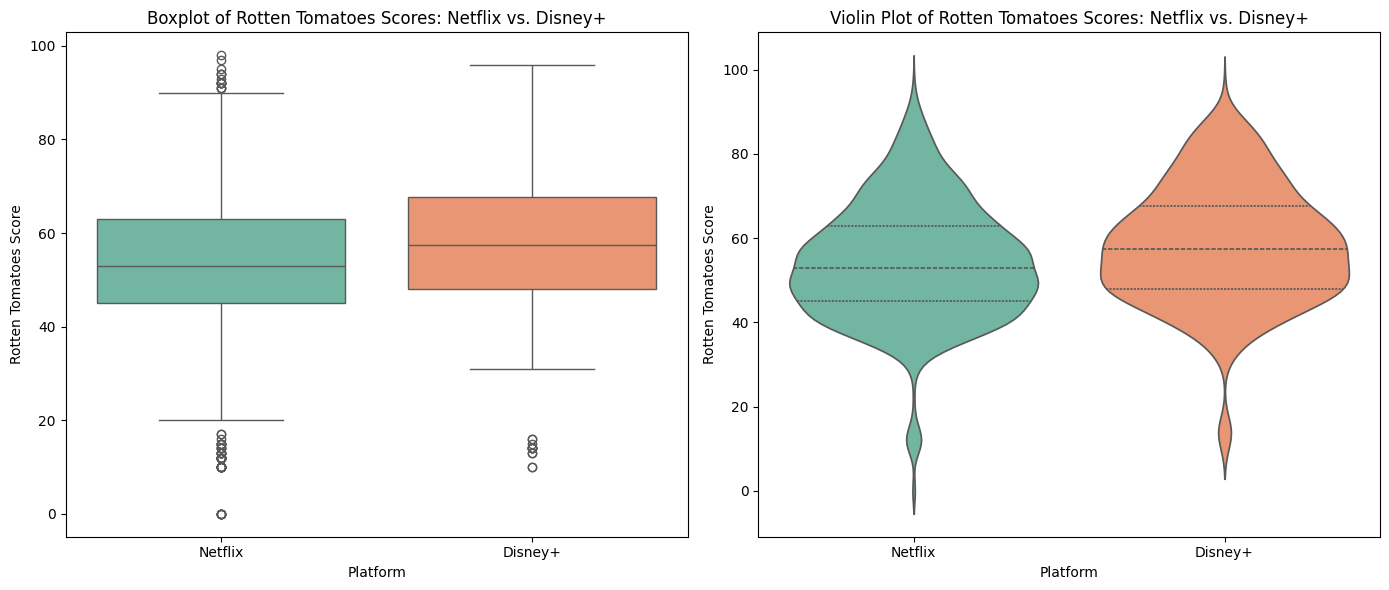

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure for side-by-side plots
plt.figure(figsize=(14, 6))

# Boxplot for Rotten Tomatoes scores
plt.subplot(1, 2, 1)
sns.boxplot(data=combined_data, x='Platform', y='New_Rotten_Tomatoes', palette='Set2')
plt.title("Boxplot of Rotten Tomatoes Scores: Netflix vs. Disney+")
plt.xlabel("Platform")
plt.ylabel("Rotten Tomatoes Score")

# Violin plot for Rotten Tomatoes scores
plt.subplot(1, 2, 2)
sns.violinplot(data=combined_data, x='Platform', y='New_Rotten_Tomatoes', palette='Set2', inner="quartile")
plt.title("Violin Plot of Rotten Tomatoes Scores: Netflix vs. Disney+")
plt.xlabel("Platform")
plt.ylabel("Rotten Tomatoes Score")

# Show the plots
plt.tight_layout()
plt.show()
